<a href="https://colab.research.google.com/github/zwzzhong/Heart_Disease_Classification/blob/master/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Barneybean/heart_disease_classification/master/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
2,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
3,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54.940000,0.665000,0.910000,132.010000,248.980000,0.175000,0.525000,148.835000,0.330000,1.060500,1.400000,0.800000,2.320000,0.530000
std,8.833832,0.473175,1.023296,17.549353,50.322673,0.380921,0.539286,22.973828,0.471393,1.154711,0.609803,1.027266,0.616034,0.500352
min,35.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.500000,1.000000,0.000000,130.000000,243.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,281.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,194.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null int64
chol        200 non-null int64
fbs         200 non-null int64
restecg     200 non-null int64
thalach     200 non-null int64
exang       200 non-null int64
oldpeak     200 non-null float64
slope       200 non-null int64
ca          200 non-null int64
thal        200 non-null int64
target      200 non-null int64
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


##EDA


Text(0.5, 0, 'target: (0=non-patient, 1=patient)')

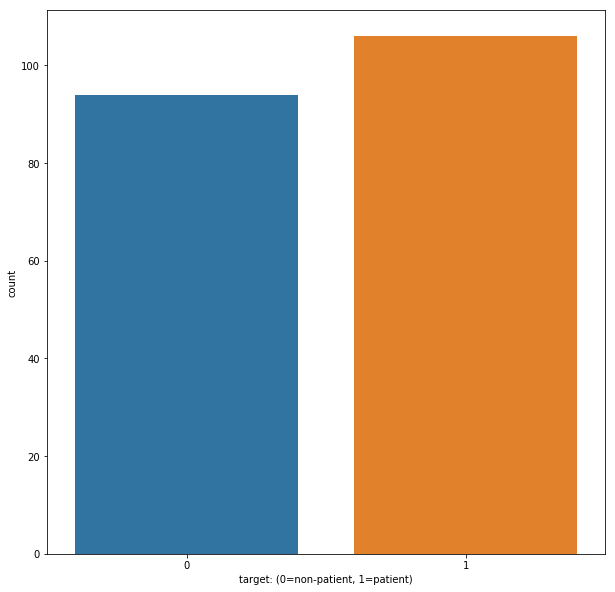

In [0]:
#distribution of patient and non-patient
plt.figure(figsize=(10,10))
sns.countplot(df['target'])
plt.xlabel('target: (0=non-patient, 1=patient)')


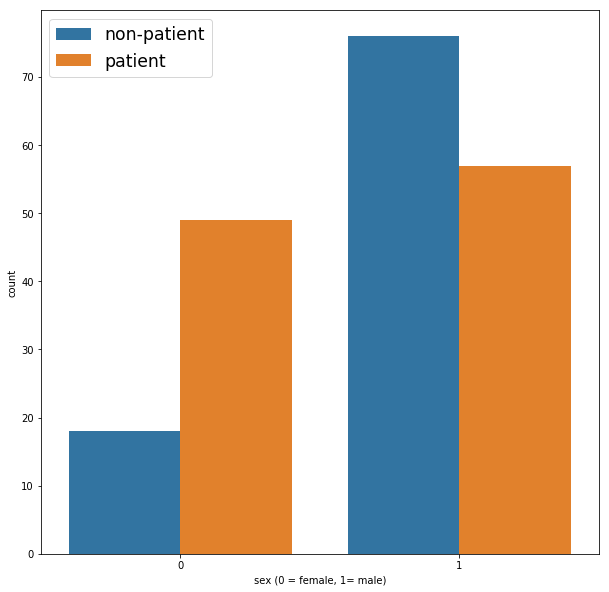

In [0]:
#distribution of sex for patient and non-patient
plt.figure(figsize=(10,10))
sns.countplot(df['sex'], hue=df['target'])
plt.xlabel("sex (0 = female, 1= male)")
plt.legend(('non-patient', 'patient'), fontsize='xx-large')



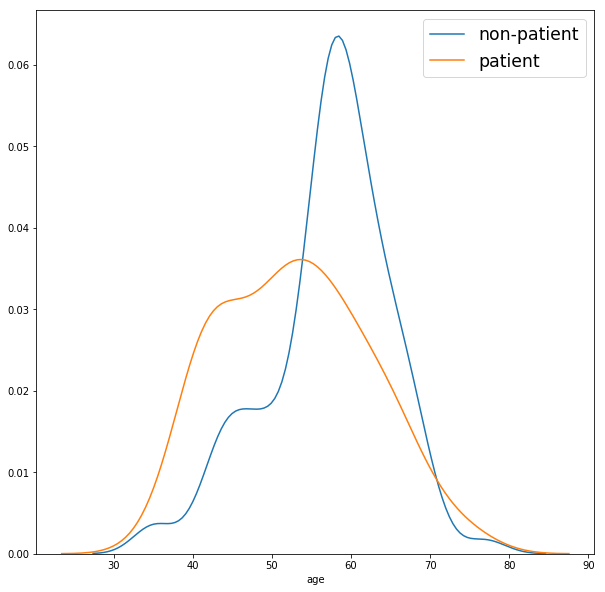

In [0]:
#distribution of age for patient and non-patient
df1 = df[df['target']==1]
df0 = df[df['target']==0]
plt.figure(figsize=(10,10))
sns.distplot(df0['age'], hist=False, label='non-patient')
sns.distplot(df1['age'], hist=False, label='patient')
plt.legend(fontsize='xx-large')

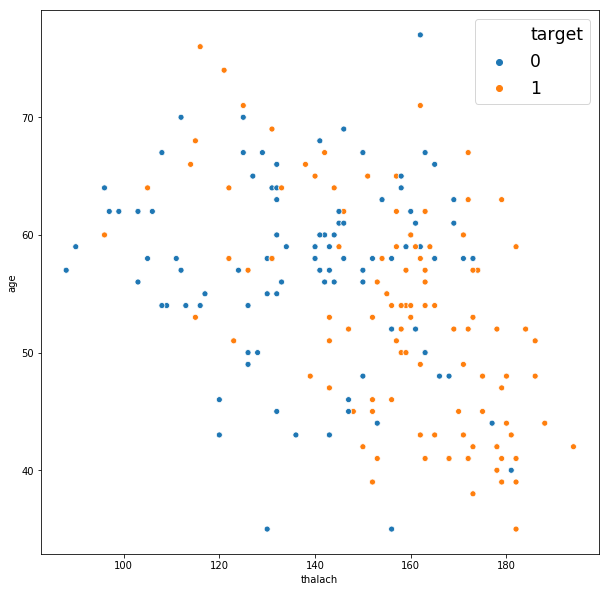

In [0]:
#correlation between max heart rate and age for patient and non-patient
plt.figure(figsize=(10,10))
sns.scatterplot(df['thalach'],df['age'],hue=df['target'])
plt.legend(fontsize='xx-large')


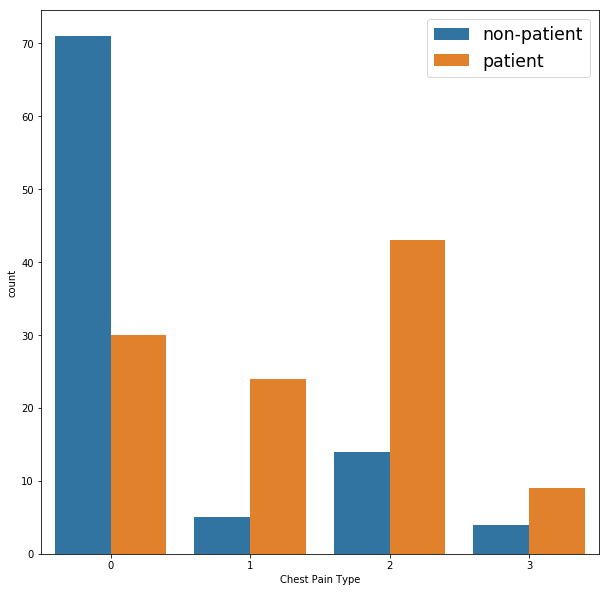

In [0]:
#distribution of chest pain for patient and non-patient
plt.figure(figsize=(10,10))
sns.countplot(df['cp'], hue=df['target'])
plt.xlabel('Chest Pain Type')
plt.legend(('non-patient', 'patient'), fontsize='xx-large')


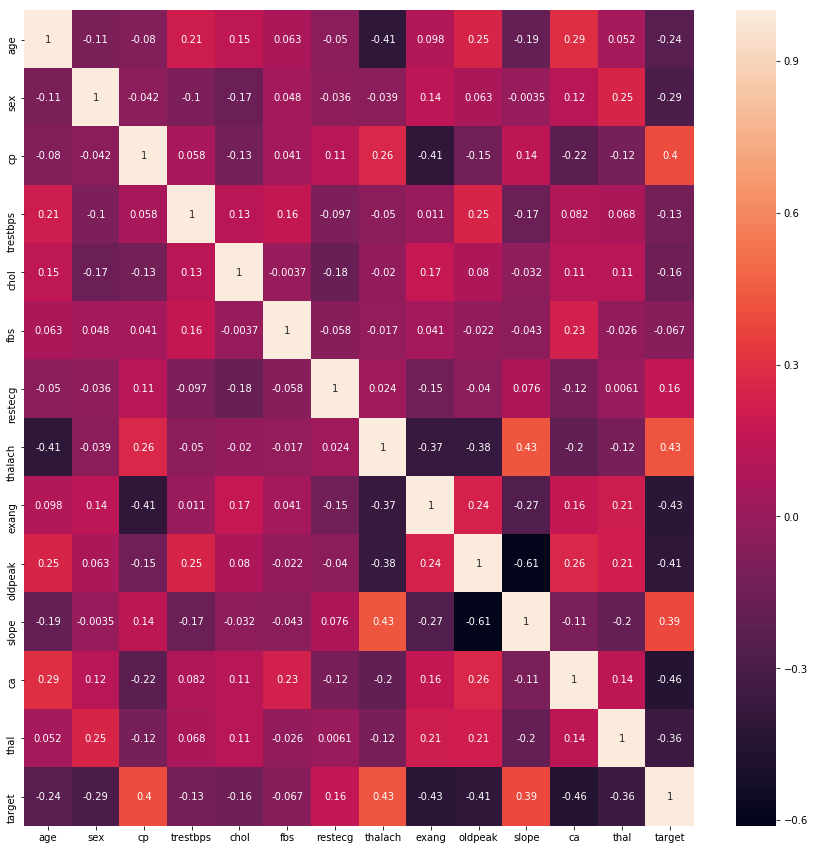

In [0]:
#Correlation heatmap
plt.figure(figsize=(15,15))
corr_x = df.corr()
sns.heatmap(corr_x, annot=True)

##Modeling

###**Train Test Data Split**

In [0]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

###**Logistic Regression**

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
# evaluate	
logit.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8333333333333334

**GridSearch for Logistic Regression**

In [0]:
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'C': np.logspace(-5, 8, 15), 'penalty': ['l2']}

# Instantiate the GridSearchCV object: logreg_cv
logit_cv = GridSearchCV(logit, param_grid, cv=5)

# Fit it to the training data
logit_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logit_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logit_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.8071428571428572


**Evaluation for Logistic Regression**

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.66      1.00      0.79        27

   micro avg       0.77      0.77      0.77        60
   macro avg       0.83      0.79      0.76        60
weighted avg       0.85      0.77      0.76        60




 Confusion Matrix:



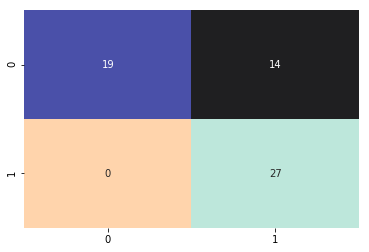

In [0]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_pred = logit_cv.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print('\n\n\n', 'Confusion Matrix:\n',)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap="icefire_r",fmt="d",cbar=False)

**The confusion matrix of logistic regression model shows that the false negtive is really high, which is the dark area on the graph. It means that we tell people they don't have heart disease but they actually have, which will cause a big problem for both patient themselves and public health system because patient might miss the right treatment time, which might be life threatening. On the other side, public health need to also allocate more resources for those potential patients since they might be too late to be diagnosed with heart disease.**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

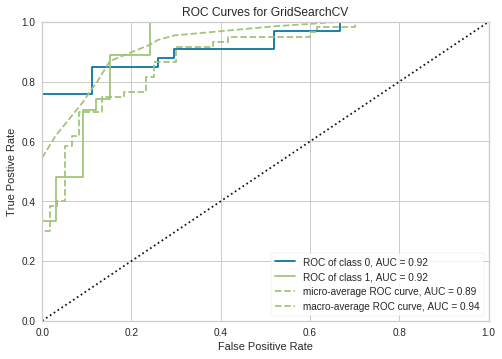

In [0]:
from yellowbrick.classifier import ROCAUC
#ROC AUC
classes=[0,1]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logit_cv, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


###**SVM**

**Support Vector Machine**

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = logit.predict(X_test)
# evaluate	
svm.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.45

**GridSearch for SVM**

In [0]:
# Create the hyperparameter grid
param_grid = {'C':[1, 10, 100], 'gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: logreg_cv
svm_cv = GridSearchCV(svm, param_grid, cv=5)

# Fit it to the training data
svm_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Print the optimal parameters and best score
print("Tuned SVM Parameter: {}".format(svm_cv.best_params_))
print("Tuned SVM Accuracy: {}".format(svm_cv.best_score_))

Tuned SVM Parameter: {'C': 1, 'gamma': 0.01}
Tuned SVM Accuracy: 0.6142857142857143


**Evaluation for SVM**

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.12      0.20        33
           1       0.44      0.85      0.58        27

   micro avg       0.45      0.45      0.45        60
   macro avg       0.47      0.49      0.39        60
weighted avg       0.47      0.45      0.37        60




 Confusion Matrix:



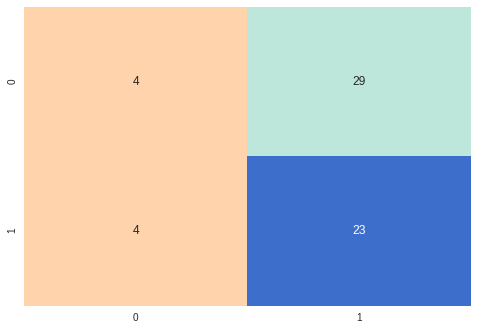

In [0]:
y_pred = svm_cv.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print('\n\n\n', 'Confusion Matrix:\n',)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap="icefire_r",fmt="d",cbar=False)

**Same false negative issue with the SVM model. With a high false negative, it means people are told healthy actually have heart disease. It's a serious problem because it could be life threatening.**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


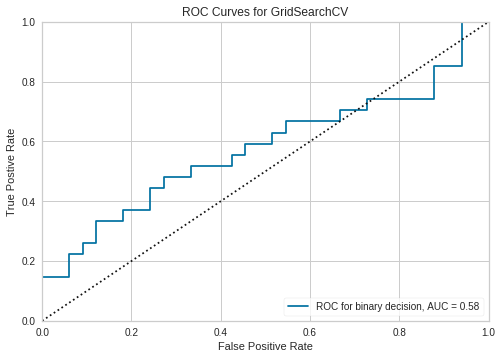

In [0]:
#ROC AUC
classes=[0,1]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(svm_cv, classes=classes, micro=False, macro=False, per_class=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


###**Random Forest**

**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = logit.predict(X_test)
# evaluate	
rfc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.75

**GridSearch for Random Forest Classifier**

In [0]:
# Create the hyperparameter grid
param_grid = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']}

# Instantiate the GridSearchCV object: logreg_cv
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)

# Fit it to the training data
rfc_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Print the optimal parameters and best score
print("Tuned Random Forest Classifier Parameter: {}".format(rfc_cv.best_params_))
print("Tuned Random Forest Classifier Parameter Accuracy: {}".format(rfc_cv.best_score_))

Tuned Random Forest Classifier Parameter: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
Tuned Random Forest Classifier Parameter Accuracy: 0.85


**Evaluation for SVM**

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.67      0.79        33
           1       0.70      0.96      0.81        27

   micro avg       0.80      0.80      0.80        60
   macro avg       0.83      0.81      0.80        60
weighted avg       0.84      0.80      0.80        60




 Confusion Matrix:



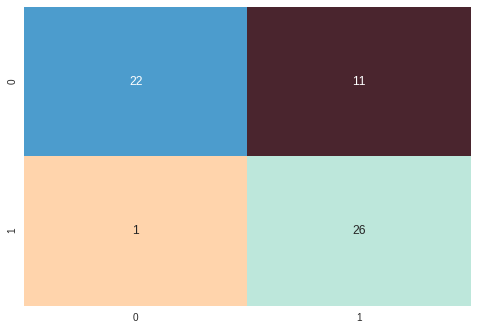

In [0]:
y_pred = rfc_cv.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print('\n\n\n', 'Confusion Matrix:\n',)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap="icefire_r",fmt="d",cbar=False)

**Compared to SVM and Logistic model, random forest perform a better result in false negative but it might still be not enough since in this business case we want the false negative as lower as possible, because we don't want people with heart disease miss their right treatment time. But to lower false negative might leads to an increase of false positive, which means health people were told that they have heart disease. But this is acceptable because we cannot just rely on this model to tell people they have heart disease or not. If the model predicts a positive result, people can always perform further examination to confirm if they have heart disease or not.**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


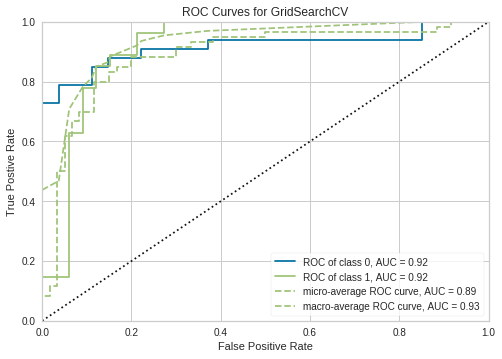

In [0]:
#ROC AUC
classes=[0,1]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(rfc_cv, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


### **AutoML**

**H2O AutoML**

In [0]:
#install h2o automl
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()

In [0]:
#convert my train/test data
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [0]:
# Import a sample binary outcome train/test set into H2O
train = h2o.H2OFrame(df_train)
test = h2o.H2OFrame(df_test)

# Identify predictors and response
x = train.columns
y = "target"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_20190503_232734_model_3,0.925296,0.534402,0.144532,0.347263,0.120592
XGBoost_grid_1_AutoML_20190503_232734_model_3,0.921353,0.410921,0.1464,0.354237,0.125484
XGBoost_grid_1_AutoML_20190503_232734_model_1,0.915335,0.380733,0.141523,0.343189,0.117779
XGBoost_grid_1_AutoML_20190503_232734_model_4,0.91492,0.380075,0.145258,0.342877,0.117565
XGBoost_1_AutoML_20190503_232734,0.91409,0.401099,0.164661,0.351837,0.12379
GBM_grid_1_AutoML_20190503_232734_model_1,0.913468,0.372413,0.139656,0.340652,0.116044
XGBoost_grid_1_AutoML_20190503_232734_model_2,0.912222,0.390557,0.183648,0.348494,0.121448
GBM_1_AutoML_20190503_232734,0.911392,0.410768,0.169849,0.359494,0.129236
StackedEnsemble_AllModels_AutoML_20190503_232734,0.907865,0.397313,0.160926,0.348513,0.121462
XGBoost_3_AutoML_20190503_232734,0.907242,0.453188,0.141523,0.374488,0.140241


###**Model Comparison**

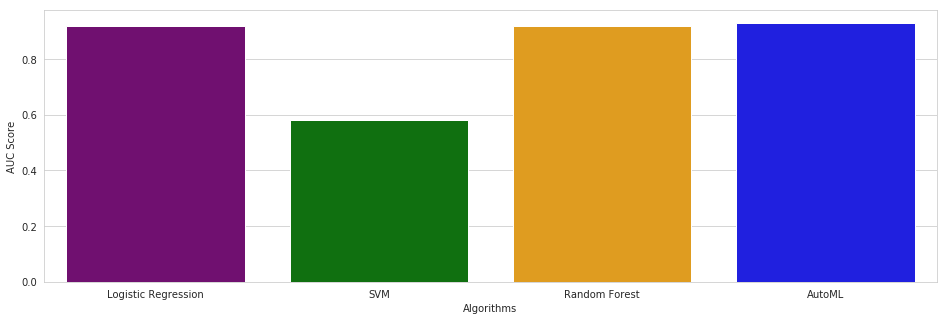

In [0]:
methods = ["Logistic Regression", "SVM", "Random Forest", "AutoML"]
accuracy = [0.92, 0.58, 0.92, 0.93]
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1, step=0.2))
plt.ylabel("AUC Score")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

# Conclusion



*   **For the hyperparameter tunning part, a more detailed gridsearch can be performed if more time and computing power available**
*   **In this business case, false negative is way more serious than false positive. Therefore, we need to lower our false negative as much as possible.**
*   **For all four different models, SVM has the worst result and rest of the model share almost the same AUC score, but after looking into the false negative rate, Random Forest or AutoML mightbe a better choice for this classification problem**

